In [77]:
import pyfits


def ReadFits(f):
    
    h = pyfits.open(f)
    n_bins = len(h[1].data.columns)
    master = np.zeros((n_bins,len(h[1].data)))
    for i in range(n_bins):
        master[i] = h[1].data.field(i)
    E = h[2].data.field(0)
    return E, master


def ConstructICS(model):
    E, data = ReadFits('../ics_isotropic_comp_1_healpix_54_'+model+'.gz')
    master = data
    E, data = ReadFits('../ics_isotropic_comp_2_healpix_54_'+model+'.gz')
    master += data
    E, data = ReadFits('../ics_isotropic_comp_3_healpix_54_'+model+'.gz')
    master += data
                      
    return E, master

def ConstructPi0Brems(model):
    E, data = ReadFits('../pi0_decay_healpix_54_'+model+'.gz')
    master = data
    E, data = ReadFits('../bremss_healpix_54_'+model+'.gz')
    
    return E, master+data




In [20]:
E, ics_0 = ConstructICS('mod_v_0')
E, ics_10 = ConstructICS('mod_v_10') 

In [ ]:
E, pi0Brem_0 = ConstructPi0Brems('mod_v_0')
E, pi0Brem_10 = ConstructPi0Brems('mod_v_10')

# Log10 ICS Emission in standard diffuse model,  and for only a Gaussian CR spike ($\sigma=200 pc$).  Normalized to max value

/home/carlson/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:19: RuntimeWarning: invalid value encountered in log10


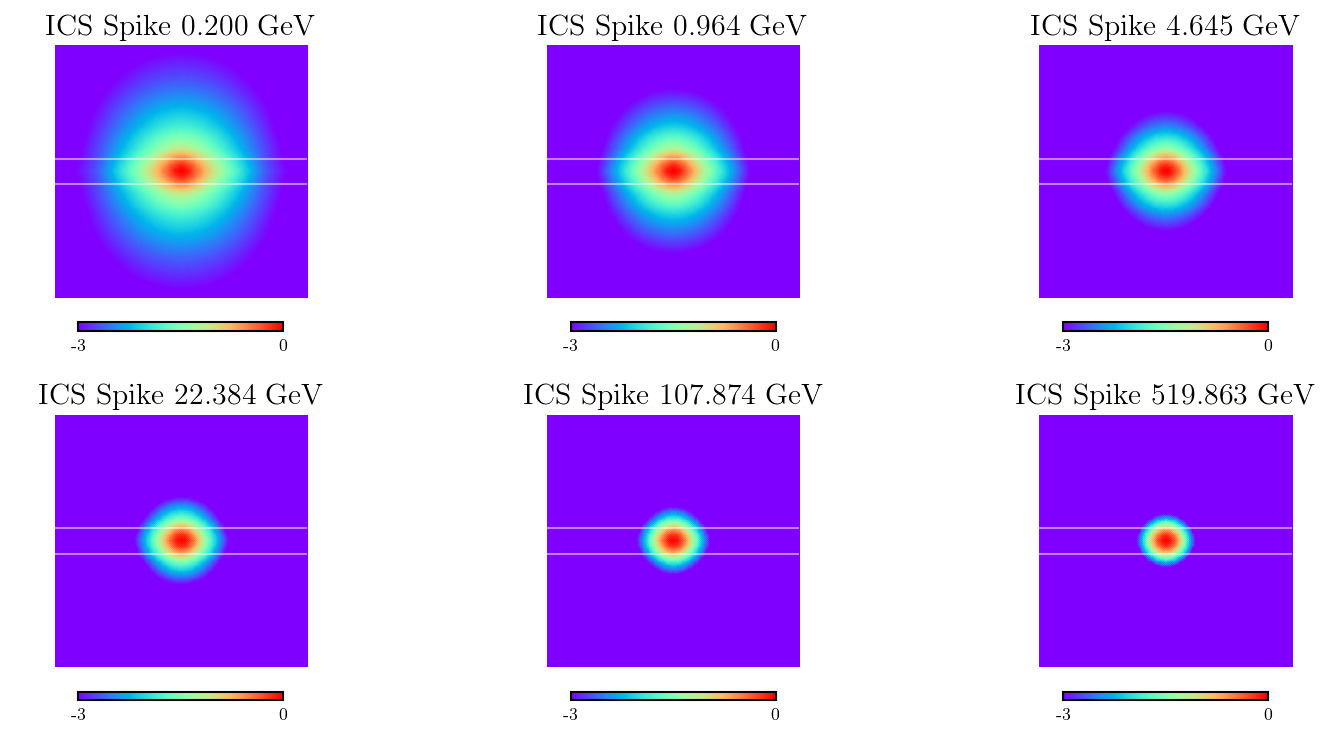

In [69]:
import healpy
plt.figure(0,figsize=(12,9))
for i, e in enumerate(E):
    if (i%6) == 0:
        try:
            plt.subplot(3,3,i/6+1)
            healpy.cartview(np.log10(ics_0[i]/np.max(ics_0[i])), title='Galactic ICS %1.3f GeV'%(e/1e3), hold=True, latra=[-20,20],  lonra=[-20,20], cmap='rainbow', min=-3)
            plt.hlines([-2,2], -20,20, color='white', alpha=0.5)
        except: pass

plt.savefig('/home/carlson/Dropbox/GCE_H2_Sources/plots/ICS_galactic.png', bbox_inches='tight')

spike = ics_10 - ics_0
plt.figure(0,figsize=(12,9))
for i, e in enumerate(E):
    if (i%6) == 0:
        try:
            plt.subplot(3,3,i/6+1)
            healpy.cartview(np.log10(spike[i]/np.max(spike[i])), title='ICS Spike %1.3f GeV'%(e/1e3), hold=True, latra=[-20,20],  lonra=[-20,20], cmap='rainbow', min=-3)
            plt.hlines([-2,2], -20,20, color='white', alpha=0.5)
        except: pass
        
plt.savefig('/home/carlson/Dropbox/GCE_H2_Sources/plots/ICS_spike.png', bbox_inches='tight')

# Log10 $\pi^0$ Emission

In [ ]:
import healpy
plt.figure(0,figsize=(12,9))
for i, e in enumerate(E):
    if (i%6) == 0:
        try:
            plt.subplot(3,3,i/6+1)
            healpy.cartview(np.log10(pi0Brem_0[i]/np.max(pi0Brem_0[i])), title='Galactic $\pi^0$+Brem %1.3f GeV'%(e/1e3), hold=True, latra=[-20,20],  lonra=[-20,20], cmap='rainbow', min=-3)
            plt.hlines([-2,2], -20,20, color='white', alpha=0.5)
            
        except: pass
plt.savefig('/home/carlson/Dropbox/GCE_H2_Sources/plots/pi0_Galactic.png', bbox_inches='tight')




spike_pi0 = pi0Brem_10 - pi0Brem_0
plt.figure(0,figsize=(12,9))
for i, e in enumerate(E):
    if (i%6) == 0:
        try:
            plt.subplot(3,3,i/6+1)
            healpy.cartview(np.log10(spike_pi0[i]/np.max(spike_pi0[i])), title='Spike $\pi^0$+Brem %1.3f GeV'%(e/1e3), hold=True, latra=[-20,20],  lonra=[-20,20], cmap='rainbow', min=-3)
            plt.hlines([-2,2], -20,20, color='white', alpha=0.5)
        except: pass
        
plt.savefig('/home/carlson/Dropbox/GCE_H2_Sources/plots/pi0_spike.png', bbox_inches='tight')

In [61]:
import h5py
h5 = h5py.File('../new/Mod_A_2D_XCO_P8.hdf5')


In [62]:
for f in h5['templates']:
    print f

brem
brem_0
energies
ics_cmb
ics_fir
ics_opt
pi0
pi0_0


In [66]:
try:
    h5_spike.close()
except: pass

h5_spike = h5py.File('../spike_template.hdf5','w')




In [75]:

try:
    del h5_spike['/templates']
except:
    pass
h5_spike.create_group('templates')
h5_spike['/templates/'].create_dataset('ics',dtype=np.float32, data=spike)
h5_spike['/templates/'].create_dataset('pi0',dtype=np.float32, data=spike_pi0)
h5_spike['/templates/'].create_dataset('energies',dtype=np.float32, data=spike_pi0)

<HDF5 dataset "energies": shape (33, 786432), type "<f4">